In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt

In [2]:
#loading the data
dt=pd.read_csv('Book1my.csv')
dt.head(6)

,tag,age,season,category,place
0,pilgrimage,40-80,summer,friends,rishikesh
1,pilgrimage,40-80,winter,family,rameshwaram
2,pilgrimage,40-80,summer,family,kedarnath
3,historical,13-70,spring,family,agra
4,historical,13-70,spring,couple,jaipur
5,historical,13-70,winter,family,kanyakumari


In [3]:
ndata  = dt.drop(columns=['age'])
ndata

,tag,season,category,place
0,pilgrimage,summer,friends,rishikesh
1,pilgrimage,winter,family,rameshwaram
2,pilgrimage,summer,family,kedarnath
3,historical,spring,family,agra
4,historical,spring,couple,jaipur
5,historical,winter,family,kanyakumari
6,historical,winter,friends,chennai
7,historical,summer,family,kedarnath
8,cultural,spring,family,agra
9,cultural,winter,family,rameshwaram


In [4]:
#hot encoding
data=pd.get_dummies(ndata,columns=['tag','season','category'])
data

,place,tag_adventure,tag_beaches,tag_cultural,tag_historical,tag_mountains,tag_pilgrimage,tag_trekking,tag_waterfalls,season_spring,season_summer,season_winter,category_couple,category_family,category_friends
0,rishikesh,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,rameshwaram,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,kedarnath,0,0,0,0,0,1,0,0,0,1,0,0,1,0
3,agra,0,0,0,1,0,0,0,0,1,0,0,0,1,0
4,jaipur,0,0,0,1,0,0,0,0,1,0,0,1,0,0
5,kanyakumari,0,0,0,1,0,0,0,0,0,0,1,0,1,0
6,chennai,0,0,0,1,0,0,0,0,0,0,1,0,0,1
7,kedarnath,0,0,0,1,0,0,0,0,0,1,0,0,1,0
8,agra,0,0,1,0,0,0,0,0,1,0,0,0,1,0
9,rameshwaram,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [5]:
X = data.drop("place", axis=1)  
y = data["place"] 

In [6]:
#data cleaning
data.isnull().sum()

place               0
tag_adventure       0
tag_beaches         0
tag_cultural        0
tag_historical      0
tag_mountains       0
tag_pilgrimage      0
tag_trekking        0
tag_waterfalls      0
season_spring       0
season_summer       0
season_winter       0
category_couple     0
category_family     0
category_friends    0
dtype: int64

In [7]:
data.shape

(32, 15)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [9]:
#Decision Tree classifier
dt_classifier = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=8,random_state=0)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=8, random_state=0)

In [10]:
dt_classifier.score(X_train, y_train)

0.72

In [11]:
#Random tree model
rf_classifier = RandomForestClassifier(criterion='entropy',max_leaf_nodes=8,random_state=0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_leaf_nodes=8, random_state=0)

In [12]:
rf_classifier.score(X_train, y_train)

0.8

In [13]:
rf_classifier.score(X_test, y_test)

0.5714285714285714

In [14]:
dt_y_pred = dt_classifier.predict(X_test)
dt_y_pred

array(['rishikesh', 'agra', 'shimla', 'shimla', 'agra', 'rameshwaram',
       'kedarnath'], dtype=object)

In [15]:
rf_y_pred = rf_classifier.predict(X_test)
rf_y_pred

array(['rishikesh', 'goa', 'shimla', 'shimla', 'agra', 'rameshwaram',
       'kedarnath'], dtype=object)

In [16]:
dt_accuracy = accuracy_score(y_test, dt_y_pred)

In [17]:
print("Decision Tree Accuracy:", dt_accuracy*100)

Decision Tree Accuracy: 42.857142857142854


In [18]:
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy*100)

Random Forest Accuracy: 57.14285714285714


In [19]:
#knowing the headings of training set
feature_names = X_train.columns
target_name = y_train.name
print(feature_names)
print(target_name)

Index(['tag_adventure', 'tag_beaches', 'tag_cultural', 'tag_historical',
       'tag_mountains', 'tag_pilgrimage', 'tag_trekking', 'tag_waterfalls',
       'season_spring', 'season_summer', 'season_winter', 'category_couple',
       'category_family', 'category_friends'],
      dtype='object')
place


In [20]:
#Prediction through binary input
dt_y_pred = dt_classifier.predict([(1,0,1,1,1,0,0,1,1,0,0,0,1,0)])
dt_y_pred

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['agra'], dtype=object)

In [21]:
#Now taking user input 
tag=input("Enter tag: ")
season = input("Enter season: ")
category = input("Enter category: ")

Enter tag: adventure
Enter season: spring
Enter category: couple


In [22]:
#Converting the given input
prediction1 = dt_classifier.predict([[int(tag == "adventure"), int(tag == "beaches"), int(tag == "cultural"), int(tag == "historical"), int(tag == "mountains"), int(tag == "pilgrimage"), int(tag == "trekking"), int(tag == "waterfalls"), int(season == "spring"), int(season == "summer"), int(season == "winter"), int(category == "couple"),int(category == "family"),int(category == "friends")]])
prediction2 = rf_classifier.predict([[int(tag == "adventure"), int(tag == "beaches"), int(tag == "cultural"), int(tag == "historical"), int(tag == "mountains"), int(tag == "pilgrimage"), int(tag == "trekking"), int(tag == "waterfalls"), int(season == "spring"), int(season == "summer"), int(season == "winter"), int(category == "couple"),int(category == "family"),int(category == "friends")]])

# Final Prediction based on user input
print("Recommended place from Decision Tree Model: ",prediction1[0])
print("Recommended place from Random forest Model: ",prediction2[0])


Recommended place from Decision Tree Model:  jaipur
Recommended place from Random forest Model:  jaipur


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [23]:
feature_names = X_train.columns
target_name = y_train.name

In [24]:
from sklearn import tree
print(tree.export_text(dt_classifier))

|--- feature_9 <= 0.50
|   |--- feature_8 <= 0.50
|   |   |--- feature_12 <= 0.50
|   |   |   |--- class: chennai
|   |   |--- feature_12 >  0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: rameshwaram
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: kanyakumari
|   |--- feature_8 >  0.50
|   |   |--- feature_11 <= 0.50
|   |   |   |--- class: agra
|   |   |--- feature_11 >  0.50
|   |   |   |--- class: jaipur
|--- feature_9 >  0.50
|   |--- feature_13 <= 0.50
|   |   |--- feature_11 <= 0.50
|   |   |   |--- class: kedarnath
|   |   |--- feature_11 >  0.50
|   |   |   |--- class: shimla
|   |--- feature_13 >  0.50
|   |   |--- class: rishikesh



[Text(0.5769230769230769, 0.9, 'x[9] <= 0.5\nentropy = 3.319\nsamples = 25\nvalue = [1, 2, 2, 1, 2, 3, 3, 2, 2, 5, 2]'),
 Text(0.3076923076923077, 0.7, 'x[8] <= 0.5\nentropy = 2.482\nsamples = 11\nvalue = [1, 2, 0, 1, 2, 3, 0, 0, 2, 0, 0]'),
 Text(0.15384615384615385, 0.5, 'x[12] <= 0.5\nentropy = 1.557\nsamples = 7\nvalue = [0, 2, 0, 0, 0, 3, 0, 0, 2, 0, 0]'),
 Text(0.07692307692307693, 0.3, 'entropy = 1.0\nsamples = 4\nvalue = [0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0]'),
 Text(0.23076923076923078, 0.3, 'x[3] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0]'),
 Text(0.15384615384615385, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]'),
 Text(0.3076923076923077, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]'),
 Text(0.46153846153846156, 0.5, 'x[11] <= 0.5\nentropy = 1.5\nsamples = 4\nvalue = [1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0]'),
 Text(0.38461538461538464, 0.3, 'entropy = 1.0\nsamples = 2\nvalue = [1, 0, 0,

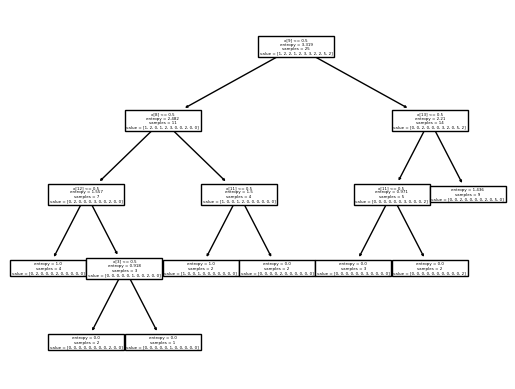

In [25]:
#Plotting decision tree
tree.plot_tree(dt_classifier)

In [26]:
#Comparing b/w decision tree and random forest accuracy 
labels = ['Decision Tree', 'Random Forest']
accuracies = [dt_accuracy, rf_accuracy]

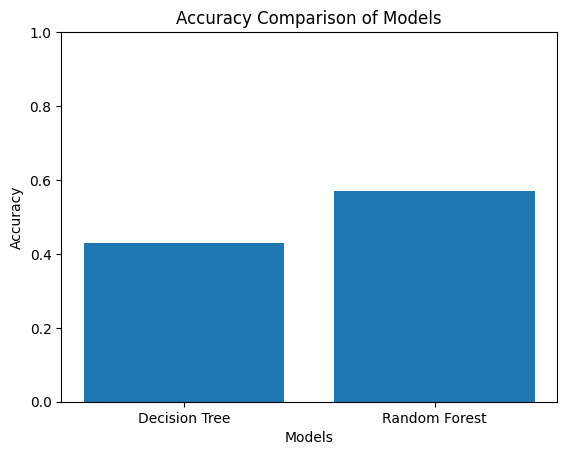

In [27]:
plt.bar(labels, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')
plt.ylim(0, 1)
plt.show()

In [28]:
#Visualizing the dataset 
tag = ndata['tag']
place = ndata['place']

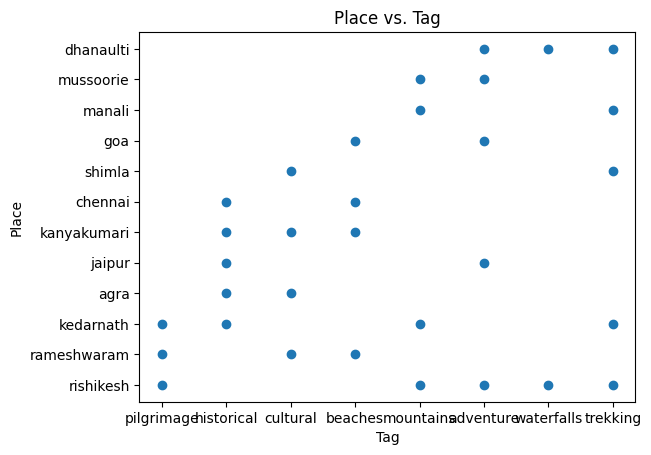

In [29]:
# Scatter plot of place vs. Tag
plt.scatter(tag,place, marker='o')
plt.xlabel('Tag')
plt.ylabel('Place')
plt.title('Place vs. Tag')
plt.show()